In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
# Artificial Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [0]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"])
gender=pd.get_dummies(X['Gender'])

In [0]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [10]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 268us/sample - loss: 0.6321 - accuracy: 0.6790 - val_loss: 0.5613 - val_accuracy: 0.7857
Epoch 2/100
5359/5359 [==============================] - 1s 187us/sample - loss: 0.5221 - accuracy: 0.7960 - val_loss: 0.5212 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 183us/sample - loss: 0.4981 - accuracy: 0.7962 - val_loss: 0.5054 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 183us/sample - loss: 0.4859 - accuracy: 0.7962 - val_loss: 0.4950 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 184us/sample - loss: 0.4775 - accuracy: 0.7962 - val_loss: 0.4874 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 181us/sample - loss: 0.4712 - accuracy: 0.7962 - val_loss: 0.4815 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 1

In [11]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


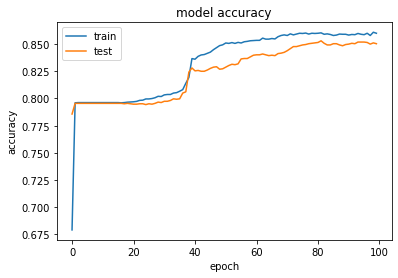

In [12]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

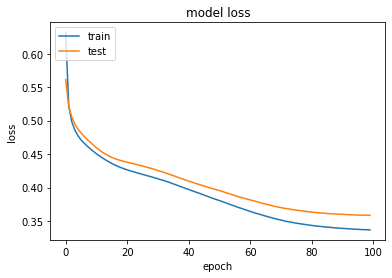

In [13]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([[0.3299524 ],
       [0.457798  ],
       [0.1976261 ],
       ...,
       [0.27720204],
       [0.1726866 ],
       [0.21800266]], dtype=float32)

In [15]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1517,   78],
       [ 202,  203]])

In [17]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.86